In [16]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers


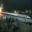

In [17]:
img=Image.open("./cifar10/test/airplane/1001_airplane.png")
img

In [18]:
img.size

(32, 32)

In [19]:
data=tf.keras.utils.image_dataset_from_directory(
    "./cifar10/train/",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=50000
)
data

Found 50000 files belonging to 10 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [20]:
'''for fe,le in data:
    print(fe.shape,le.shape)
    break'''

'for fe,le in data:\n    print(fe.shape,le.shape)\n    break'

In [21]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",input_shape=(32,32,3)),
    #layers.Conv2D(18,5,input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same"),
   # layers.Conv2D(36,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3),
    #layers.Conv2D(36,3,activation="leaky_relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10),
    layers.Softmax()
    #layers.Activation("softmax")

    
    
    ])

In [22]:
#cnn_model.build(input_shape=(1,32,32,3))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        

In [23]:
'''len(data)'''

'len(data)'

In [24]:
'''for batch in data:
    print(batch)'''

'for batch in data:\n    print(batch)'

In [25]:
'''for images,labels in data:
    labels=tf.one_hot(labels,10)
    print(images.shape,labels.shape)
    pred=cnn_model.predict(images)
    print(pred)
    break'''

'for images,labels in data:\n    labels=tf.one_hot(labels,10)\n    print(images.shape,labels.shape)\n    pred=cnn_model.predict(images)\n    print(pred)\n    break'

In [26]:
cnn_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

In [27]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,10)
    print(features.shape,labels.shape)
    #break
    record=cnn_model.fit(features,labels,batch_size=50,epochs=50)

(50000, 32, 32, 3) (50000, 10)
Epoch 1/50
1000/1000 [==============================] - 34s 33ms/step - loss: 1.5588 - accuracy: 0.4382
Epoch 2/50
1000/1000 [==============================] - 31s 31ms/step - loss: 1.2288 - accuracy: 0.5662
Epoch 3/50
1000/1000 [==============================] - 32s 32ms/step - loss: 1.0851 - accuracy: 0.6197
Epoch 4/50
1000/1000 [==============================] - 42s 42ms/step - loss: 0.9983 - accuracy: 0.6502
Epoch 5/50
1000/1000 [==============================] - 34s 34ms/step - loss: 0.9352 - accuracy: 0.6711
Epoch 6/50
1000/1000 [==============================] - 27s 27ms/step - loss: 0.8809 - accuracy: 0.6904
Epoch 7/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.8403 - accuracy: 0.7031
Epoch 8/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.8079 - accuracy: 0.7154
Epoch 9/50
1000/1000 [==============================] - 21s 21ms/step - loss: 0.7795 - accuracy: 0.7280
Epoch 10/50
1000/1000 [==========

In [28]:
cnn_model.predict(features)

1563/1563 [==============================] - 14s 7ms/step


array([[4.5640090e-14, 1.8428922e-16, 4.9015352e-09, ..., 6.4252945e-14,
        9.2423165e-18, 4.7642321e-13],
       [8.7833414e-06, 1.0913856e-09, 4.4753792e-04, ..., 1.2437206e-03,
        2.7282263e-07, 1.2853537e-05],
       [1.7323480e-04, 2.5614278e-02, 1.6194560e-02, ..., 2.0485396e-02,
        1.3615075e-05, 1.9449489e-01],
       ...,
       [3.6435004e-04, 3.5663918e-05, 7.0249803e-02, ..., 3.4809291e-02,
        1.0038061e-05, 7.4697075e-11],
       [3.4796019e-05, 6.3895228e-10, 5.6543332e-03, ..., 1.5919351e-04,
        5.3392979e-10, 7.0271922e-09],
       [1.5623016e-04, 1.6085288e-09, 9.9084005e-03, ..., 1.2450671e-04,
        1.0846278e-09, 3.2816298e-13]], dtype=float32)